In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
data = pd.read_csv("StudentsPerformance.csv")

In [80]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [82]:
data.tail(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [83]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [84]:
data.drop(['race/ethnicity','lunch'],axis=1,inplace=True)

In [86]:
data['gender'].tail()

995    female
996      male
997    female
998    female
999    female
Name: gender, dtype: object

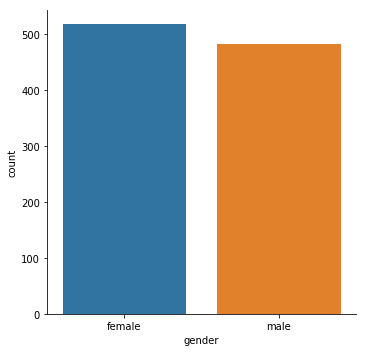

In [25]:
#See how gender is spread
sns.catplot('gender',kind='count',data=data)

([<matplotlib.patches.Wedge at 0x20f249f6518>,
 [Text(-0.06217041096298424, 1.0982417038160106, 'Female'),
  Text(0.06217041096298411, -1.0982417038160106, 'Male')],
 [Text(-0.033911133252536856, 0.5990409293541875, '51.8%'),
  Text(0.033911133252536786, -0.5990409293541875, '48.2%')])

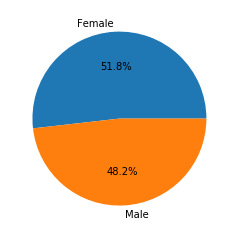

In [22]:
plt.pie(data['gender'].value_counts(),labels=['Female','Male'],autopct='%1.1f%%')

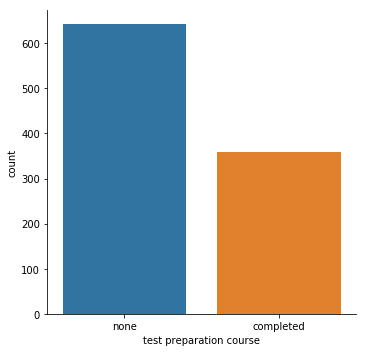

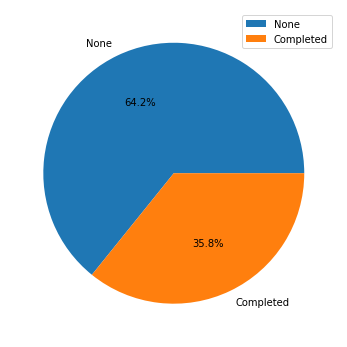

In [29]:
sns.catplot('test preparation course',kind='count',data=data)
fig1,ax1= plt.subplots(figsize=(6,6))
plt.pie(data['test preparation course'].value_counts(),labels=['None','Completed'],autopct='%1.1f%%')
plt.legend()

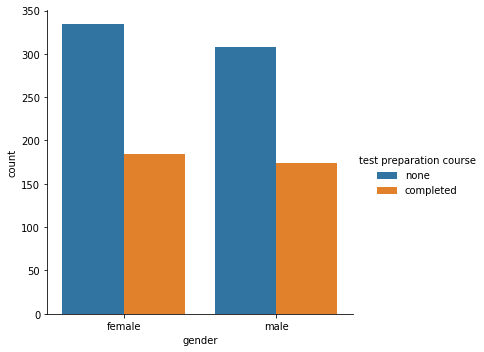

In [31]:
sns.catplot('gender',data=data,kind='count',hue='test preparation course')

C:\Users\akshi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


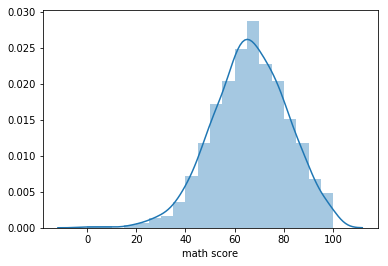

In [34]:
sns.distplot(data["math score"],bins=20)

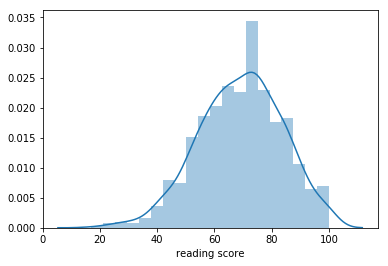

In [35]:
sns.distplot(data["reading score"],bins=20)

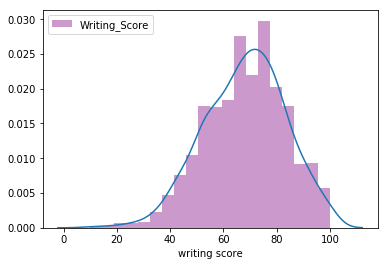

In [126]:
sns.distplot(data["writing score"],bins=20,hist_kws={'color':'purple','label':'Writing_Score'})
plt.legend()

In [91]:
#label students as above or below averagge and count above or below
average=pd.DataFrame([])
average['gender']=data['gender']
average['math_score']=data['math score'].apply(lambda x:1 if x >= data['math score'].mean() else 0 )
average['reading_score']=data['reading score'].apply(lambda x:1 if x >= data['reading score'].mean() else 0 )
average['Writing_score']=data['writing score'].apply(lambda x:1 if x >= data['writing score'].mean() else 0 )


In [93]:
average.tail(10)

,gender,math_score,reading_score,Writing_score
990,male,1,1,1
991,female,0,1,1
992,female,0,1,1
993,female,0,1,1
994,male,0,0,0
995,female,1,1,1
996,male,0,0,0
997,female,0,1,0
998,female,1,1,1
999,female,1,1,1


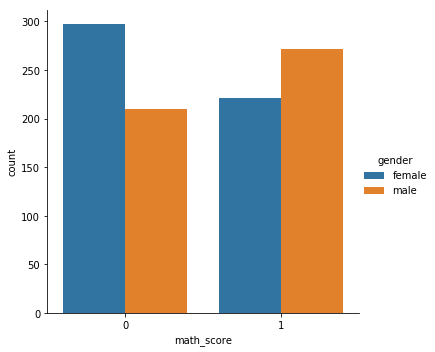

In [99]:
sns.catplot('math_score',kind='count',data=average,hue='gender')

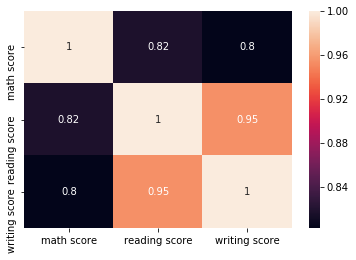

In [51]:
#correlation
sns.heatmap(data.corr(),annot=True)

In [100]:
#Student high in all

In [114]:
excellent=pd.DataFrame([])
excellent=average[(average['math_score']==1)  & (average['reading_score']==1) & (average['Writing_score']==1) ]

In [115]:
excellent

,gender,math_score,reading_score,Writing_score
0,female,1,1,1
1,female,1,1,1
2,female,1,1,1
4,male,1,1,1
5,female,1,1,1
6,female,1,1,1
13,male,1,1,1
15,female,1,1,1
16,male,1,1,1
23,female,1,1,1


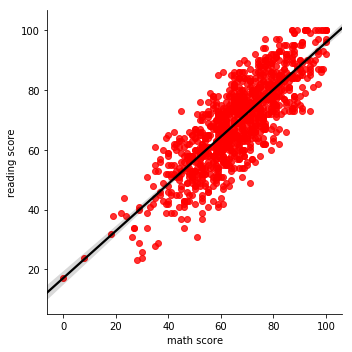

In [128]:
sns.lmplot(x='math score',y='reading score', data = data,scatter_kws={'color':'red'},line_kws={'color':'black'})